# Python como lenguaje de programación
--------------------------------------------------------------

## Introducción

En este capitulo vamos a explorar las particularidad de Python a la hora de  de escribir código.

Teniendo en cuenta que ya sabemos programar, no haremos una revisión exhaustiva de todos los elementos del lenguaje. Vamos a destacar aquellos propios de Python y, en particular, los que puedan llevar a error por su aparente similitud con otros lenguajes.

Para una visión mucho más extensa de este tema recomiendo visitar el [Tutorial oficial de Python3](https://docs.python.org/3/tutorial/)

## Variables / tipos

### Tipado
Python es un lenguaje de programación de tipado dinámico:
 - No tenemos que especificar el tipo de las variables.
 - Una variable puede almacenar distintos tipos de valores en distintos momentos.

In [15]:
a = 1
print(a, type(a))
a = 'foo'
print(a,type(a))

1 <class 'int'>
foo <class 'str'>


A su vez, tambien tiene tipado fuerte:
 - Si un dato es de un tipo concreto no se puede usar como si fuera de otro tipo

In [14]:
a = 'foo'
b = 100
print(a+chr(b))
print(a+b)


food


TypeError: must be str, not int

### None y del
_None_ es el único valor del tipo NoneType:
 - Representa una variable que no ha sido inicializada
 - Similar a puntero _NULL_
 - Una variable a _None_ no es lo mismo que una variable no definida

In [17]:
a = None
print(a, type(a))
print(c, type(c))

None <class 'NoneType'>


NameError: name 'c' is not defined

Al asignar _None_ a una variable borramos el dato guardado, pero no la variable.  
Para borrar completamente la variable hay que usar _del_

In [20]:
a = None
print(a)
del a
print(a)

None


NameError: name 'a' is not defined

### Tipos numéricos _int_ y _float_
Sólo hay dos tipos básicos para representar números _int_ para enteros y _float_ para punto flotante. La precisión viene fijada por el interprete que estemos usando.

In [25]:
a, b, c =  1, 1., 1.23456789123456789
print(a,type(a))
print(b, type(b))
print(c, type(c))

1 <class 'int'>
1.0 <class 'float'>
1.234567891234568 <class 'float'>


Podemos representar enteros en hexadecimal y en binario

In [3]:
a = 0xf0
b = 0b101
print(a,b)

240 5


### Cadenas de caractéres
Podemos usar comillas simples o dobles

In [31]:
a = 'Comillas simples'
b = 'Comillas dobles'
c = 'La cadena termina con el mismo tipo de "comillas" con el que empieza'
print(a, b)
print(c)

Comillas simples Comillas dobles
La cadena termina con el mismo tipo de "comillas" con el que empieza


Hay que distinguir entre las cadenas de símbolos ortograficos en sí, y las sequiencias de bytes que las representan.
 - Las cadenas de simbolos son objetos de tipo _str_
 - Las secuencias de bytes son objetos de tipo _bytes_

En Python3, por defecto, el texto entrecomillado se considera de tipo _str_ , para tomarlo como _bytes_ hay que poner una _b_ delante.

In [29]:
print(type('foo'), type(b'foo'))

<class 'str'> <class 'bytes'>


Para pasar de _str_ a _bytes_ podemos usar el método _encode_ que toma como parámetro el esquéma de codificación a utilizar (por defecto _UTF-8_ ).

In [22]:
print('foo', 'foo'.encode('utf-8'), 'foo'.encode('latin-1'))
print('bar', 'bar'.encode('utf-8'), 'bar'.encode('latin-1'))
print('🎵Daisy, Daisy, give me your answer do.🎵'.encode('utf-8'))
print('añejo', 'añejo'.encode('utf-8'), 'añejo'.encode('latin-1'))
print('foo'.encode('ascii'), 'añejo'.encode('ascii'))

foo b'foo' b'foo'
bar b'bar' b'bar'
b'\xf0\x9f\x8e\xb5Daisy, Daisy, give me your answer do.\xf0\x9f\x8e\xb5'
añejo b'a\xc3\xb1ejo' b'a\xf1ejo'


UnicodeEncodeError: 'ascii' codec can't encode character '\xf1' in position 1: ordinal not in range(128)

Para pasar de _bytes_ a _str_ usamos el método decode.

In [41]:
print(b'foo'.decode('utf-8'))
print(b'a\xc3\xb1ejo'.decode('utf-8'))
print(b'a\xc3\xb1ejo'.decode('latin-1'))

foo
añejo
aÃ±ejo


Los operadores _+_ y _*_ están sobrecargados para que funcionen con objetos _str_

In [42]:
a = 'foo'
b = 'bar'
print(a+b)
print(2*a + 3*b)

foobar
foofoobarbarbar


Para generar texto con formato podemos usar la función _format(\)_ o _f-strings_

In [11]:
name = 'Dave'
print('Hello, {}'.format(name))
print(f'Hello, {name}')

someInt = 9000
someFloat = 123.4567
print(f'Integer with min size: {someInt:8}; Float with max decimal places: {someFloat:.2f}')

Hello, Dave
Hello, Dave
Integer with min size: 9000    ; Float with max decimal places: 123.46


Por último tenemos las cadenas multi-linea, que se delimitan con tres comillas en cada extremo

In [19]:
song = """    🎵 Daisy, Daisy, give me your answer do. 
    I'm half crazy all for the love of  you.
    It won't be a stylish marriage, I can't afford a carriage.
    But you'll look sweet upon the seat of a bicycle built for two. 🎵"""
print(song)

    🎵 Daisy, Daisy, give me your answer do. 
    I'm half crazy all for the love of  you.
    It won't be a stylish marriage, I can't afford a carriage.
    But you'll look sweet upon the seat of a bicycle built for two. 🎵


### Listas, tuplas, sets, diccionarios

Listas y tuplas son **secuencias ordenadas** de valores. Se puede acceder a un valor concreto mediante su índice. La numeración **empieza en 0**.

Las tuplas se delimitan con parentesis _\(\)_ y son inmutables

In [52]:
a = (1, 2, 3)
b = (1,)
c = (1, 'dos', None)
print(a,b,c)

(1, 2, 3) (1,) (1, 'dos', None)


In [54]:
a = (1,2,3)
print(a[0])
a[0] = 4
print(a[0])

1


TypeError: 'tuple' object does not support item assignment

Las listas se delimitan con parentesis y son mutables

In [55]:
a = [1,2,3]
b = [1,]
c = [1,'dos',None]

In [57]:
a = [1,2,3]
print(a[0])
a[0] = 4
print(a[0])
a.append(5)
print(a)

1
4
[4, 2, 3, 5]


Tanto con listas como con tuplas podemos usar _slices_ para referirnos a un subconjunto de sus elementos. Se representan mediante _\[inicio:fin:paso\]_
Ojo que los indices no representan exactamente lo mismo cuando se refieren a un elemento que cuando se refieren a un _slice_\. Los _slices_ incluyen el elemento inicial, pero no el final.
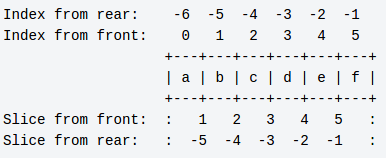
Se puede considerar que los _slices_ apuntan a la frontera entre 2 elementos como se ve en la imagen anterior.

In [52]:
a = ['a', 'b', 'c', 'd', 'e', 'f']
print(a[0], a[3])
print(a[0:3])
print()
print(a[1], a[-2])
print(a[1:-2])
print()
print(a[::2], a[::-1])

a d
['a', 'b', 'c']

b e
['b', 'c', 'd']

['a', 'c', 'e'] ['f', 'e', 'd', 'c', 'b', 'a']


Los sets son conjuntos **desordenados** de elementos **únicos** (sin repeticiones). Se delimitan con llaves

In [32]:
a = {1, 2, 3, 4, 5}
print(a)
a.add(6)
print(a)
a.discard(1)
print(a)
a.add(2)
print(a)

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5, 6}
{2, 3, 4, 5, 6}
{2, 3, 4, 5, 6}


Podemos comprobar facilmente si un cierto elemento pertenece a un set. Tambien podemos realizar operaciones basicas de conjuntos.

In [41]:
a = {1,2,3,4}
b = {2,4,6,8}
print('Is 1 inside a?', 1 in a)
print('Is 5 inside a?',5 in a)

print(a.union(b))
print(a.difference(b))
print(a.intersection(b))

Is 1 inside a? True
Is 5 inside a? False
{1, 2, 3, 4, 6, 8}
{1, 3}
{2, 4}


### Numpy.array
Los arrays de numpy no pertenecen a la libreria estandar, pero son practicamente indispensables para cualquier cálculo numérico y, además, se parecen mucho a las matrices de Matlab, así que los discutiremos brevemente.

Este tipo de datos se encuentra definido en la libreria _numpy_ así que lo primero es importar dicha libreria (suponiendo que ya la tenemos instalada)

In [44]:
import numpy

Podemos inicializarlos pasando una lista/tupla al constructor (sólo admite datos numericos o booleanos) o mediante _numpy.zeros(\)_\, _numpy.ones(\)_

In [48]:
arr1D = numpy.array([1,2,3])
arr2D = numpy.array(((1,2),(1,2),(1,2)))
print(arr1D)
print(arr2D)
print()
print(numpy.zeros([3,4]))
print(numpy.ones((4,2)))

[1 2 3]
[[1 2]
 [1 2]
 [1 2]]

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Podemos acceder a elementos individuales mediante sus indices o a subconjuntos mediante slices.  
Para arrays bidimensionales el primer indice representa la fila y el segundo la columna 

In [55]:
a = numpy.array([[1,2],[3,4],[5,6]])
print(a)
print()
print(a[2,1])
print()
print(a[:,0])
print()
print(a[0:2,:])

[[1 2]
 [3 4]
 [5 6]]

6

[1 3 5]

[[1 2]
 [3 4]]


## Operadores
### Matemáticos
### Lógicos (Valores considerados True o False)
### Operadores numpy

## Control del flujo
### if, else, elif
### try, except, else, finally
### with, \_\_enter\_\_, \_\_exit\_\_
### for, range(), enumerate(), zip()
  - continue, break, else

## List comprehensions

## Funciones
### Definición de funciones
  - pass
  - Default values, positional/keyword arguments
  - args, kwargs
  - Doc strings
### Funciones como variables
  - Lambda expressions
  - Closures

## Clases
### Definición
  - \_\_init\_\_, \_\_del\_\_
  - Miembros privados
  - variables estáticas (ojo)
### Herencia
  - super()
  - @classmethod
  - @staticmethod